In [1]:
%matplotlib inline

import os
import sys
genre_class_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print("Loading Genre_Classification system from path", genre_class_path)
sys.path.append(genre_class_path)

import numpy as np
import pandas as pd
import tensorflow as tf
import json
import random
import pickle

Loading Genre_Classification system from path /mnt/d/UNIV NOTES/Y4S1/DSA4199/genre_classification


2022-11-17 16:25:53.598729: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-17 16:25:53.598792: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from nltk import download
from sklearn import svm
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/kathyij74/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
wkspc = os.path.join(genre_class_path, 'workspace')
model_wkspc = os.path.join(wkspc, 'model_pickle')

with open(os.path.join(model_wkspc, 'full_std_svc'), 'rb') as file1:
    clf = pickle.load(file1)
with open(os.path.join(model_wkspc, 'full_std_lin'), 'rb') as file2:
    clf2 = pickle.load(file2)
with open(os.path.join(model_wkspc, 'full_std_svc_b'), 'rb') as file3:
    clf3 = pickle.load(file3)
with open(os.path.join(model_wkspc, 'full_std_lin_b'), 'rb') as file4:
    clf4 = pickle.load(file4)

In [4]:
features_path = os.path.join(wkspc, 'features')

features = pd.read_csv(os.path.join(features_path, 'full_ns_features.csv'))

In [5]:
features.head()

,Unnamed: 0,0
0,0,abandon
1,1,abid
2,2,abil
3,3,abl
4,4,aboard


In [6]:
features = list(features.iloc[:,1])

In [7]:
features[:10]

['abandon',
 'abid',
 'abil',
 'abl',
 'aboard',
 'abod',
 'abomin',
 'about',
 'abov',
 'abreast']

In [8]:
# check feature importance

def f_importances(coef, names, title):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names)))
    plt.barh(range(20), imp[:10] + imp[-10:], align='center')
    plt.yticks(range(20), names[:10] + names[-10:])
    plt.ylabel("Top 10 Features for Each Genre")
    plt.xlabel("SVM Weight")
    plt.title(title)
    plt.show()

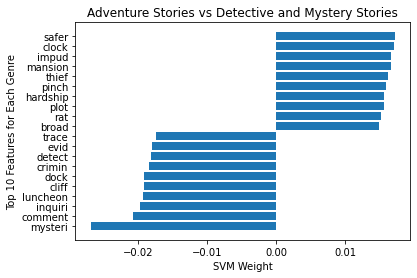

In [9]:
f_importances(clf.coef_[0], features, "Adventure Stories vs Detective and Mystery Stories")

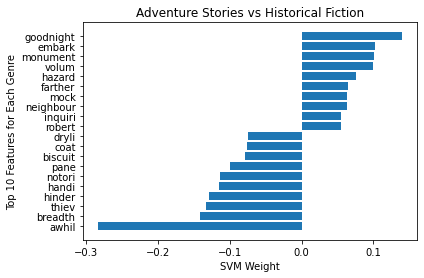

In [10]:
f_importances(clf.coef_[1], features, "Adventure Stories vs Historical Fiction")

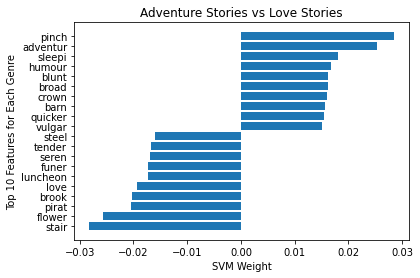

In [11]:
f_importances(clf.coef_[2], features, "Adventure Stories vs Love Stories")

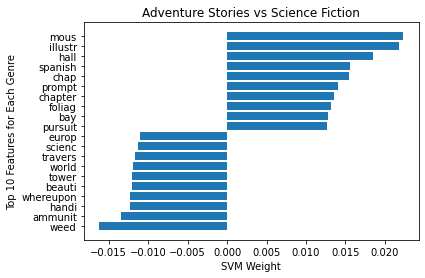

In [12]:
f_importances(clf.coef_[3], features, "Adventure Stories vs Science Fiction")

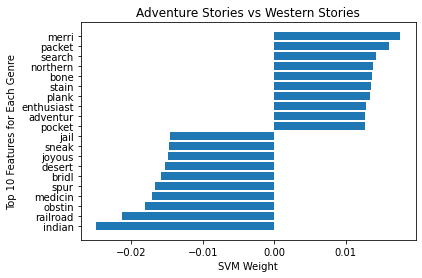

In [13]:
f_importances(clf.coef_[4], features, "Adventure Stories vs Western Stories")

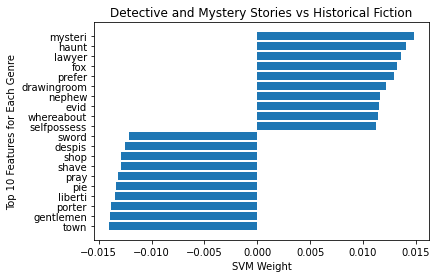

In [14]:
f_importances(clf.coef_[5], features, "Detective and Mystery Stories vs Historical Fiction")

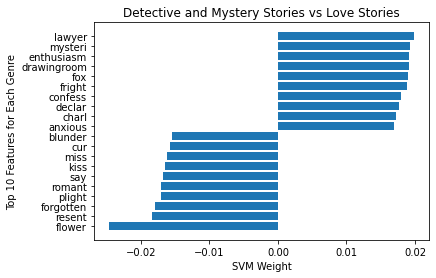

In [15]:
f_importances(clf.coef_[6], features, "Detective and Mystery Stories vs Love Stories")

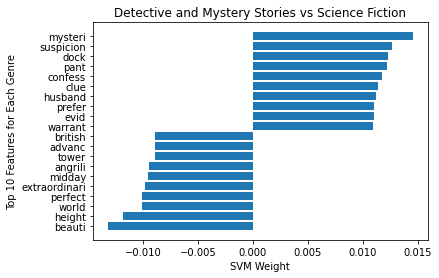

In [16]:
f_importances(clf.coef_[7], features, "Detective and Mystery Stories vs Science Fiction")

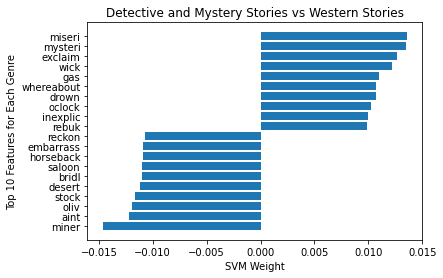

In [17]:
f_importances(clf.coef_[8], features, "Detective and Mystery Stories vs Western Stories")

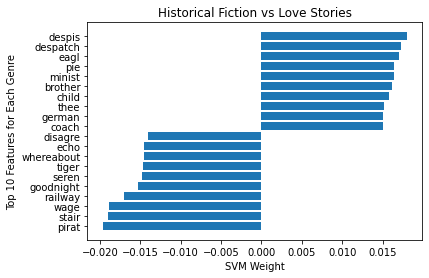

In [18]:
f_importances(clf.coef_[9], features, "Historical Fiction vs Love Stories")

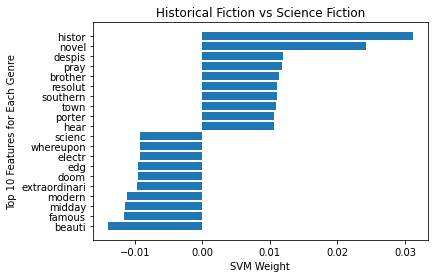

In [19]:
f_importances(clf.coef_[10], features, "Historical Fiction vs Science Fiction")

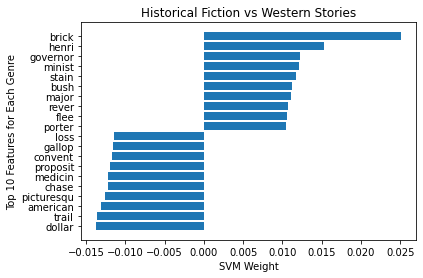

In [20]:
f_importances(clf.coef_[11], features, "Historical Fiction vs Western Stories")

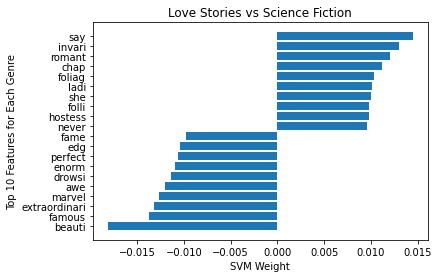

In [21]:
f_importances(clf.coef_[12], features, "Love Stories vs Science Fiction")

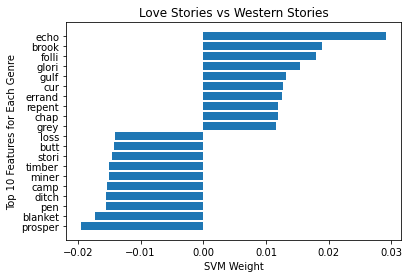

In [22]:
f_importances(clf.coef_[13], features, "Love Stories vs Western Stories")

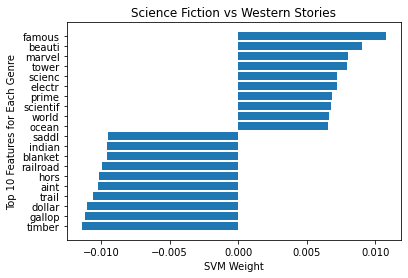

In [23]:
f_importances(clf.coef_[14], features, "Science Fiction vs Western Stories")

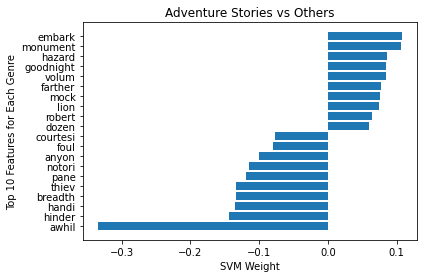

In [24]:
f_importances(clf2.coef_[0], features, "Adventure Stories vs Others")

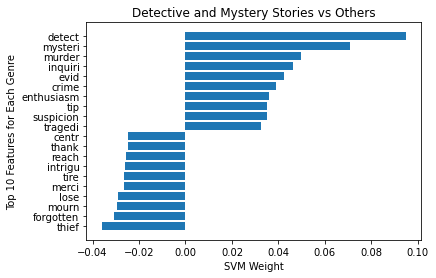

In [25]:
f_importances(clf2.coef_[1], features, "Detective and Mystery Stories vs Others")

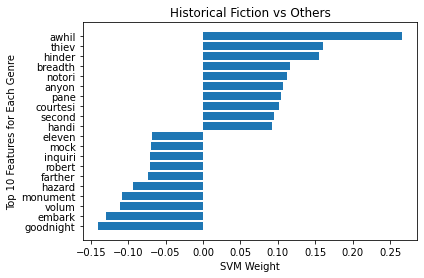

In [26]:
f_importances(clf2.coef_[2], features, "Historical Fiction vs Others")

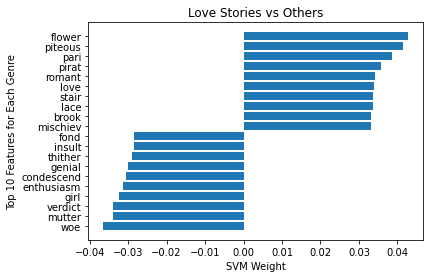

In [27]:
f_importances(clf2.coef_[3], features, "Love Stories vs Others")

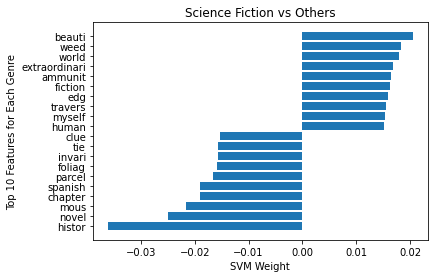

In [28]:
f_importances(clf2.coef_[4], features, "Science Fiction vs Others")

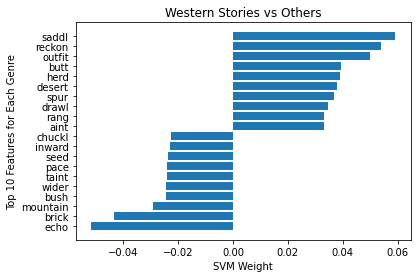

In [29]:
f_importances(clf2.coef_[5], features, "Western Stories vs Others")

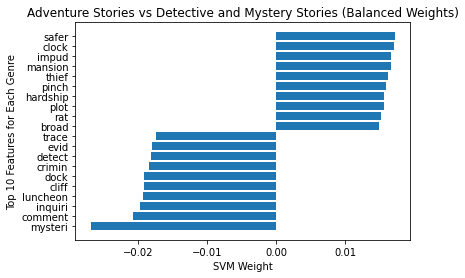

In [30]:
f_importances(clf3.coef_[0], features, "Adventure Stories vs Detective and Mystery Stories (Balanced Weights)")

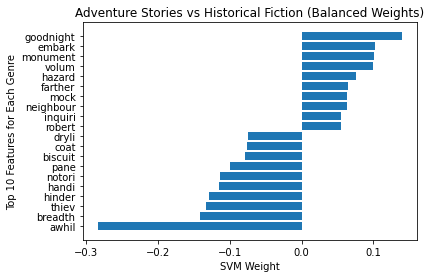

In [31]:
f_importances(clf3.coef_[1], features, "Adventure Stories vs Historical Fiction (Balanced Weights)")

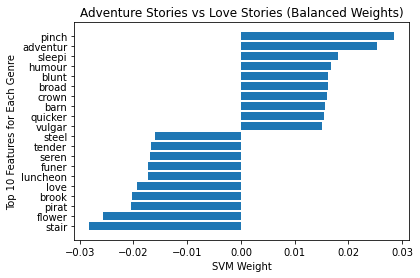

In [32]:
f_importances(clf3.coef_[2], features, "Adventure Stories vs Love Stories (Balanced Weights)")

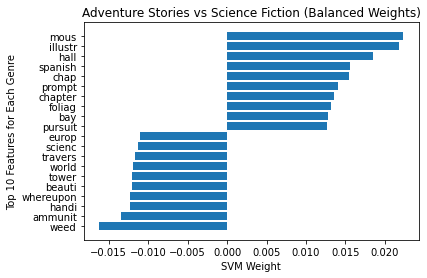

In [33]:
f_importances(clf3.coef_[3], features, "Adventure Stories vs Science Fiction (Balanced Weights)")

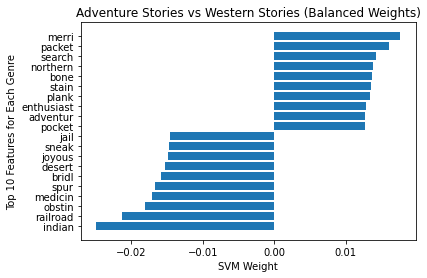

In [34]:
f_importances(clf3.coef_[4], features, "Adventure Stories vs Western Stories (Balanced Weights)")

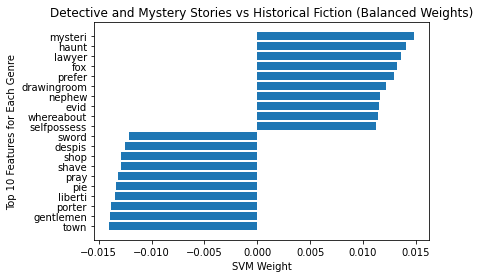

In [35]:
f_importances(clf3.coef_[5], features, "Detective and Mystery Stories vs Historical Fiction (Balanced Weights)")

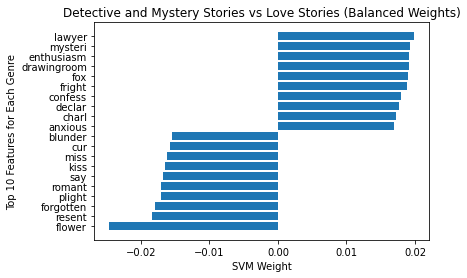

In [36]:
f_importances(clf3.coef_[6], features, "Detective and Mystery Stories vs Love Stories (Balanced Weights)")

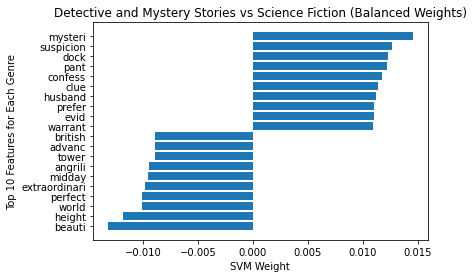

In [37]:
f_importances(clf3.coef_[7], features, "Detective and Mystery Stories vs Science Fiction (Balanced Weights)")

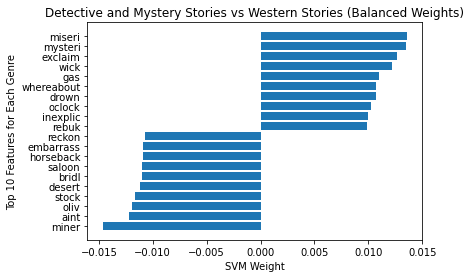

In [38]:
f_importances(clf3.coef_[8], features, "Detective and Mystery Stories vs Western Stories (Balanced Weights)")

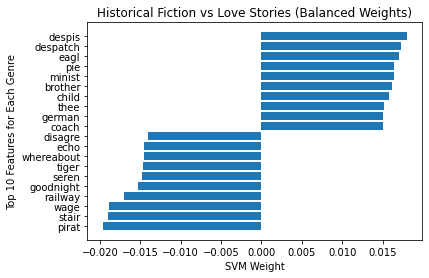

In [39]:
f_importances(clf3.coef_[9], features, "Historical Fiction vs Love Stories (Balanced Weights)")

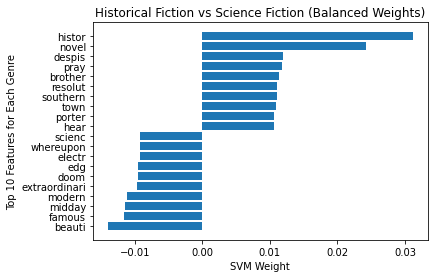

In [40]:
f_importances(clf3.coef_[10], features, "Historical Fiction vs Science Fiction (Balanced Weights)")

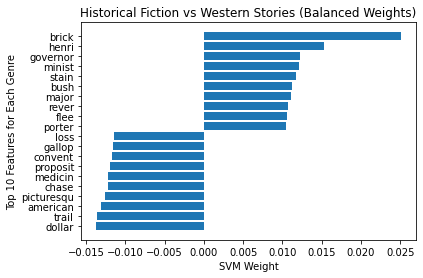

In [41]:
f_importances(clf3.coef_[11], features, "Historical Fiction vs Western Stories (Balanced Weights)")

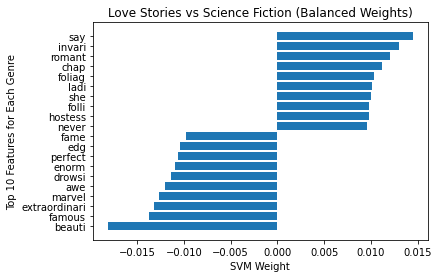

In [42]:
f_importances(clf3.coef_[12], features, "Love Stories vs Science Fiction (Balanced Weights)")

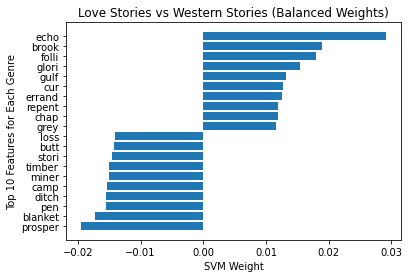

In [43]:
f_importances(clf3.coef_[13], features, "Love Stories vs Western Stories (Balanced Weights)")

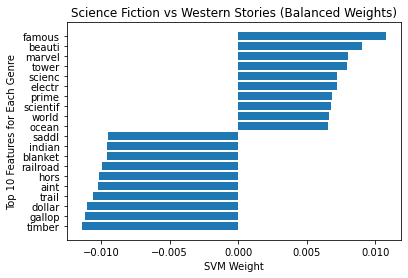

In [44]:
f_importances(clf3.coef_[14], features, "Science Fiction vs Western Stories (Balanced Weights)")

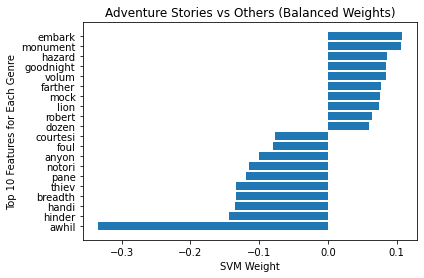

In [45]:
f_importances(clf4.coef_[0], features, "Adventure Stories vs Others (Balanced Weights)")

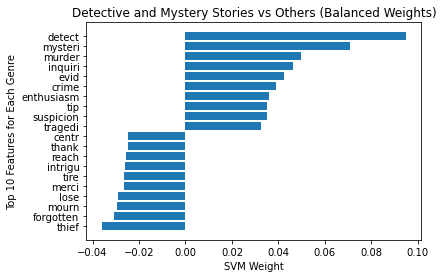

In [46]:
f_importances(clf4.coef_[1], features, "Detective and Mystery Stories vs Others (Balanced Weights)")

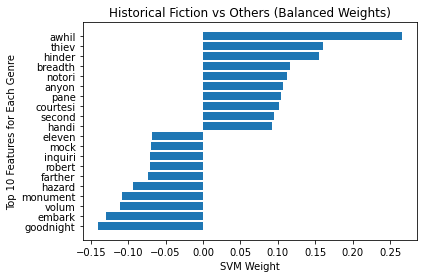

In [47]:
f_importances(clf4.coef_[2], features, "Historical Fiction vs Others (Balanced Weights)")

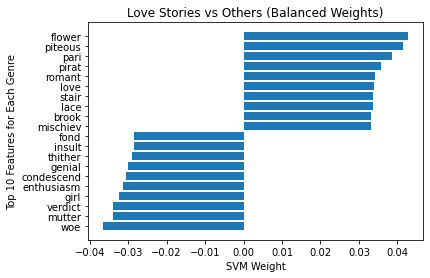

In [48]:
f_importances(clf4.coef_[3], features, "Love Stories vs Others (Balanced Weights)")

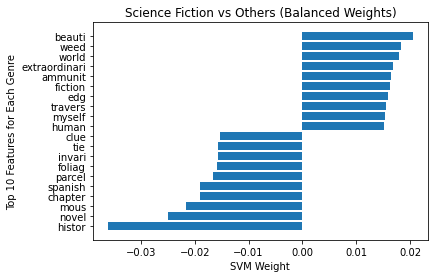

In [49]:
f_importances(clf4.coef_[4], features, "Science Fiction vs Others (Balanced Weights)")

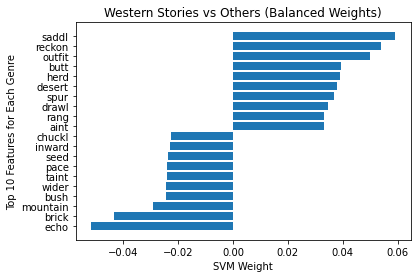

In [50]:
f_importances(clf4.coef_[5], features, "Western Stories vs Others (Balanced Weights)")